## STOCK PREDICTION - LSTM method


<p> In this section, the user will be presented with predictions of the evolution on stock´s Close price. Reader (assuming he is as a stock buyer) can use the model predictions to help him decide when to buy or sell the stocks. However, it should be noted that stock market prices are highly volatile with no consistent patterns and that makes stock prices modelling difficult. It is impossible to model stock prices over time near-perfectly but scientists are not discouraged by this. There are many approaches on stock´s prices prediction computation. We decided to use two short-term measures - standard averaging (STA) and exponential moving average (EMA) -  and one long-term - LSTM (Long Short-Term Memory). This file will focus on long-term predicting via LSTM model.  </p>

<p>While averaging methods are used for predicting the next one point in time value, LSTM approach predicts future sequence of values (usually 30 days). Compared to STA and EMA predictions, we decided that the output of LSTM model will be presented graphically rather than numerically since we believe it is more informative to see the sequence of predicted values in a graph than in a table. In this file, we will predict the evolution of stock´s Closing price for 30 days in the future. </p>

<p>There are various ways how to predict number of steps in the future. We decided to employ LSTM model. It is a machine learning model that can be applied in sequence prediction problems which is trained based on training/testing sample and input/output values. </p>

**Note**: The models are not "golden rule" you should follow no matter what. It is important to understand that those models provide some sort of guidance on how the stock market might develop and also help you understand the market. Nevertheless, it is not wise to base your investment strategy solely on the predictions given by the models and we as authors of this project definitely do not encourage you to do so.

**Disclaimer**: The mathematical methods and approaches used in the prediction analyses employed by authors of this project are based on the measures standardly used in the research area. The LSTM prediction is based on DataCamp LSTM stock market prediction tutorial, Predicting Sequential Data using LSTM: An Introduction by George V Jose and Stock Price Prediction And Forecasting Using Stacked LSTM tutorial by Krish Naik. Thus, the authors do not claim the procedures used are their own inventions and do not take any credit for them.


Firstly, import the packages we will need for our analysis

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import keras 

from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt # for graph

import SP500_data_downloader as SP
from SP500_data_downloader import *

Next, we download stock market data we will be working with. The user can define the one ticker for which the LSTM prediction will be conducted - this is done by adjusting the following line of code: *tick = "GE"*.

**NOTE:** Again, for time saving reasons, we download data only for 9 tickers (AAPL, MSFT, GE, IBM, AA, DAL, UAL, PEP, KO) with the help of function get_data_try() (for more details on how the function is defined, see SP500_data_downloader.py or Data_S&P500_Yahoo.ipynb in the main branch of our repository). The corresponding dataset is denoted as *aaa*. This step means that for the analysis the user can choose only from the list of those 9 tickers mentioned above.


In [3]:
import SP500_data_downloader as SP
from SP500_data_downloader import *

In [4]:
aaa=get_data_try()

In [17]:
aaa

Attributes   Adj Close                                                 \
Symbols           AAPL        MSFT          GE         IBM         AA   
Date                                                                    
2015-01-02   24.714506   41.193840  167.903961  114.906487  37.160915   
2015-01-05   24.018261   40.815018  164.821976  113.098442  35.008011   
2015-01-06   24.020529   40.215984  161.270950  110.659363  35.265427   
2015-01-07   24.357342   40.726921  161.337921  109.936157  36.178062   
2015-01-08   25.293207   41.925034  163.280991  112.325615  37.207710   
...                ...         ...         ...         ...        ...   
2022-01-31  174.557602  310.980011   94.480003  133.570007  56.709999   
2022-02-01  174.387817  308.760010   97.949997  135.529999  58.169998   
2022-02-02  175.616257  313.459991   98.040001  137.250000  59.209999   
2022-02-03  172.679993  301.250000   98.320000  137.779999  62.740002   
2022-02-04  172.389999  305.940002   99.010002  137.149994  64.220001   

Attributes                                                    Close  ...  \
Symbols           DAL        UAL         PEP         KO        AAPL  ...   
Date                                                                 ...   
2015-01-02  44.267330  66.339996   76.954895  33.559845   27.332500  ...   
2015-01-05  43.529236  66.150002   76.376373  33.559845   26.562500  ...   
2015-01-06  42.503120  64.580002   75.797813  33.814690   26.565001  ...   
2015-01-07  42.278088  65.529999   78.014221  34.236774   26.937500  ...   
2015-01-08  43.376217  66.639999   79.432060  34.650894   27.972500  ...   
...               ...        ...         ...        ...         ...  ...   
2022-01-31  39.689999  42.880001  173.520004  61.009998  174.779999  ...   
2022-02-01  40.490002  43.959999  172.339996  60.560001  174.610001  ...   
2022-02-02  40.520000  44.119999  175.470001  61.180000  175.839996  ...   
2022-02-03  39.730000  43.080002  175.369995  61.610001  172.899994  ...   
2022-02-04  39.849998  42.820000  172.490005  60.959999  172.389999  ...   

Attributes       Open       Volume                                    \
Symbols            KO         AAPL        MSFT         GE        IBM   
Date                                                                   
2015-01-02  42.259998  212818400.0  27913900.0  5319704.0  5779673.0   
2015-01-05  42.689999  257142000.0  39673900.0  5464316.0  5104898.0   
2015-01-06  42.410000  263188400.0  36447900.0  8288800.0  6429448.0   
2015-01-07  42.799999  160423600.0  29114100.0  5673525.0  4918083.0   
2015-01-08  43.180000  237458000.0  29645200.0  5619172.0  4431693.0   
...               ...          ...         ...        ...        ...   
2022-01-31  60.299999  115541600.0  46444500.0  7001600.0  5859000.0   
2022-02-01  60.910000   86213900.0  40950400.0  8149200.0  6206400.0   
2022-02-02  60.619999   84914300.0  36636000.0  5561400.0  5357200.0   
2022-02-03  60.939999   89418100.0  43730000.0  6213300.0  6100800.0   
2022-02-04  61.490002   82391400.0  35070300.0  6403200.0  4140200.0   

Attributes                                                            
Symbols            AA         DAL         UAL        PEP          KO  
Date                                                                  
2015-01-02  4340408.0   8637300.0   6215000.0  3545700.0   9921100.0  
2015-01-05  9026467.0  10556500.0   5033400.0  6441000.0  26292600.0  
2015-01-06  8063670.0  12880400.0   6051700.0  6195000.0  16897500.0  
2015-01-07  6637744.0  10516200.0   5135000.0  6526300.0  13412300.0  
2015-01-08  8185851.0  10499300.0   6889500.0  7131600.0  21743600.0  
...               ...         ...         ...        ...         ...  
2022-01-31  7206100.0  10657300.0  11871000.0  5908000.0  22045300.0  
2022-02-01  5939300.0   9668800.0   9614300.0  5952700.0  20841700.0  
2022-02-02  5613800.0  10249800.0  12135300.0  5767000.0  20225600.0  
2022-02-03  8076600.0   9922000.0   8016500.0  4632

Here you can select the ticker for which you would like to see the LSTM prediction - AAPL, MSFT, GE, IBM, AA, DAL, UAL, PEP, KO.

In [34]:
# define the ticker of your choice (select only one)
tick="GE"

In [42]:


# the prediction is done for Close -> select Close only
data_close_all=pd.DataFrame(aaa.Close)
data_close_all["idx"] = range(1, len(aaa.Close[tick])+1)

# subset Close for ticker of choice 
close_data = aaa.Close[tick].values


# determine the split proportion of training vs testing
split_percent = 0.80
split = int(split_percent*len(close_data))
# train/test sample to be included in the graphs with the predicted values
close_train_orig = close_data[:split]
close_test_orig = close_data[split:]
close_data_orig = close_data

# NOTE: LSTM are sensitive to the scale of the data. so we need to apply MinMax scaler to transform our data into 0-1 scale
scaler=MinMaxScaler(feature_range=(0,1))
close_data_reshaped_scaled=scaler.fit_transform(np.array(aaa.Close[tick].values).reshape(-1,1))
close_data=close_data_reshaped_scaled

# train/test sample used in the LSTM modelling
close_train = close_data[:split]
close_test = close_data[split:]

date_train = data_close_all['idx'][:split]
date_test = data_close_all['idx'][split:]

#print(len(close_train))
#print(len(close_test))

Making minor modifications, so the samples fit DataGeneratorSeq.

In [423]:
# reassing the the names, so that we can input it into Class DataGeneratorSeq 
train_data=close_train
test_data=close_test

Here, we define data generator that will help us to train the LSTM model. DataGeneratorSeq creates batches of input and output data whose number is based on *num_unroll* parameter.

In [424]:
# define data generator that will train your model


class DataGeneratorSeq(object):

    def __init__(self,prices,batch_size,num_unroll):
        self._prices = prices
        self._prices_length = len(self._prices) - num_unroll
        self._batch_size = batch_size
        self._num_unroll = num_unroll
        self._segments = self._prices_length //self._batch_size
        self._cursor = [offset * self._segments for offset in range(self._batch_size)]

    def next_batch(self):

        batch_data = np.zeros((self._batch_size),dtype=np.float32)
        batch_labels = np.zeros((self._batch_size),dtype=np.float32)

        for b in range(self._batch_size):
            if self._cursor[b]+1>=self._prices_length:
                #self._cursor[b] = b * self._segments
                self._cursor[b] = np.random.randint(0,(b+1)*self._segments)

            batch_data[b] = self._prices[self._cursor[b]]
            batch_labels[b]= self._prices[self._cursor[b]+np.random.randint(0,5)]

            self._cursor[b] = (self._cursor[b]+1)%self._prices_length

        return batch_data,batch_labels

    def unroll_batches(self):

        unroll_data,unroll_labels = [],[]
        init_data, init_label = None,None
        for ui in range(self._num_unroll):

            data, labels = self.next_batch()    

            unroll_data.append(data)
            unroll_labels.append(labels)

        return unroll_data, unroll_labels

    def reset_indices(self):
        for b in range(self._batch_size):
            self._cursor[b] = np.random.randint(0,min((b+1)*self._segments,self._prices_length-1))



dg = DataGeneratorSeq(train_data,100,120)
u_data, u_labels = dg.unroll_batches()

for ui,(dat,lbl) in enumerate(zip(u_data,u_labels)):   
    print('\n\nUnrolled index %d'%ui)
    dat_ind = dat
    lbl_ind = lbl
    print('\tInputs: ',dat )
    print('\n\tOutput:',lbl)



Unrolled index 0
	Inputs:  [0.0093113  0.01015404 0.02370971 0.00566597 0.06269107 0.12146258
 0.12626548 0.15637216 0.10944024 0.11703543 0.11499447 0.13366775
 0.1553365  0.19574955 0.22497283 0.22335838 0.24750464 0.21362063
 0.23198931 0.2226679  0.1817979  0.22471899 0.16937949 0.1799803
 0.19310945 0.22066753 0.22932896 0.22281002 0.23849802 0.17705593
 0.19092637 0.1959628  0.19294702 0.18704753 0.15354937 0.19004299
 0.21767208 0.2640862  0.27112293 0.25746575 0.2721079  0.26190305
 0.2741793  0.27835262 0.28592753 0.26952875 0.2352792  0.24264088
 0.23977743 0.27395594 0.26688874 0.29428428 0.31425732 0.28440443
 0.30185923 0.30958644 0.32632026 0.31453145 0.32158852 0.30476326
 0.35447747 0.42509878 0.41678262 0.45393625 0.42826682 0.44330496
 0.39826167 0.44263482 0.41882357 0.41037542 0.392088   0.4098068
 0.41287333 0.4094311  0.4333134  0.47653908 0.4583329  0.5202421
 0.50348794 0.50377226 0.51656634 0.5369658  0.579034   0.6051095
 0.64714724 0.51402783 0.57863796 0.5

In [144]:
u_data

[array([241.42642, 232.26727, 301.94696, 307.45245, 269.54956, 309.7998 ,
        296.13614, 311.54153, 323.78378, 280.63065, 355.34534, 348.7888 ,
        416.7167 , 435.81583, 435.1001 , 506.3964 , 580.56055, 538.53   ,
        603.01   , 540.73   , 506.91   , 541.31   , 557.95   , 671.67   ,
        762.55   , 730.22   , 736.93   , 802.75   , 805.59   , 820.13   ],
       dtype=float32),
 array([246.93193, 225.92091, 298.03302, 309.4995 , 267.21222, 311.57156,
        291.4965 , 311.8819 , 321.63162, 282.62262, 359.4995 , 349.12912,
        416.17618, 436.04605, 437.2923 , 516.7518 , 589.3093 , 533.87   ,
        598.08   , 536.92   , 500.72   , 543.95   , 553.06   , 660.92   ,
        760.04   , 712.8    , 747.6    , 799.65   , 780.29   , 821.62   ],
       dtype=float32),
 array([253.05305, 227.53754, 292.15216, 308.55856, 268.16318, 303.9139 ,
        295.55054, 313.2933 , 317.89288, 284.93494, 364.1141 , 351.7017 ,
        417.82782, 434.24924, 435.54053, 518.1331 , 587.05206, 5

In [425]:
# make sure that u_data is np.array and denote it as "train_generator2"
train_generator2=np.array(u_data)
print(train_generator2.ndim)
type (train_generator2)

# next, reshape (because we need 3 dimensions in the model)
#train_generator2 = train_generator2.reshape(train_generator2.shape[0], 1, train_generator2.shape[1])
train_generator2 = train_generator2.reshape(train_generator2.shape[0], train_generator2.shape[1], 1)
print(train_generator2.ndim)

2
3


In [138]:
train_generator2

array([[[ 241.42642,  231.82182,  293.86386,  285.28027,  250.43544,
          273.5886 ,  315.16516,  324.52954,  294.2092 ,  384.2092 ,
          361.987  ,  400.33533,  451.90192,  508.1081 ,  591.07605,
          518.     ,  577.25   ,  558.25   ,  546.45   ,  547.19   ,
          667.96   ,  783.79   ,  713.53   ,  733.19   ,  790.46   ,
          809.84   ,  835.14   ,  961.01   ,  967.47   , 1110.29   ]],

       [[ 246.93193,  235.38539,  295.56555,  285.06506,  242.75275,
          269.86987,  316.8869 ,  320.94095,  298.25827,  379.2993 ,
          362.82782,  400.45544,  444.29428,  508.008  ,  567.2823 ,
          520.17   ,  572.12   ,  556.44   ,  541.8    ,  554.25   ,
          659.69   ,  777.85   ,  725.41   ,  731.88   ,  801.23   ,
          812.5    ,  838.51   ,  937.82   ,  972.08   , 1114.21   ]],

       [[ 253.05305,  232.43243,  296.04605,  278.82883,  242.53253,
          260.59058,  320.44543,  323.78378,  293.2833 ,  372.41742,
          357.95294,  404.35

In [108]:
type (train_generator2)

numpy.ndarray

In [426]:
# make sure that u_data is np.array and denote it as "test_generator2"
test_generator2=np.array(u_labels)
print(test_generator2.ndim)
type (test_generator2)

# next, reshape (because we need 3 dimensions in the model)
#test_generator2 = test_generator2.reshape(test_generator2.shape[0], 1, test_generator2.shape[1])
test_generator2 = test_generator2.reshape(test_generator2.shape[0],test_generator2.shape[1], 1)
print(test_generator2.ndim)

2
3


In [96]:
test_generator2

array([[[ 249.6096 ,  296.4014 ,  246.74675,  333.03802,  285.5255 ,
          377.48248,  452.95294,  593.93896,  592.54   ,  572.9    ,
          652.47   ,  757.56   ,  802.79   ,  853.99   ,  988.49   ]],

       [[ 246.93193,  296.04605,  237.67767,  329.83484,  285.5255 ,
          377.21722,  452.95294,  593.93896,  588.12   ,  572.9    ,
          652.47   ,  765.89   ,  800.71   ,  853.99   ,  991.42   ]],

       [[ 249.6096 ,  296.15115,  240.35036,  325.33533,  287.74774,
          377.48248,  445.77078,  602.002  ,  580.32   ,  561.17   ,
          665.52   ,  769.67   ,  800.71   ,  856.51   , 1033.67   ]],

       [[ 237.24725,  296.15115,  249.03403,  325.33533,  290.6707 ,
          377.21722,  445.65067,  602.002  ,  582.36   ,  561.17   ,
          666.98   ,  762.9    ,  809.57   ,  860.08   ,  991.46   ]],

       [[ 243.74875,  296.15115,  249.03403,  311.8819 ,  290.6707 ,
          377.21722,  445.65067,  606.046  ,  589.52   ,  561.64   ,
          666.98   ,  

Our data is finally ready, so we are able to continue with creating and training the network. As regards the LSTM parameters, we follow what is typical for LSTM stock prediction and use Adam optimizer and Mean Squared Loss function with 150 epochs.

In [427]:
look_back = 100

model = Sequential()
model.add(
    LSTM(10,
        activation='relu',
        input_shape=(look_back, 1))
)
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

num_epochs = 150

model.fit(train_generator2, epochs=num_epochs, verbose=1)

Train on 120 samples
Epoch 1/150
120/120 [==============================] - 5s 45ms/sample - loss: 1.2067
Epoch 2/150
120/120 [==============================] - 0s 2ms/sample - loss: 1.1785
Epoch 3/150
120/120 [==============================] - 0s 2ms/sample - loss: 1.1527
Epoch 4/150
120/120 [==============================] - 0s 2ms/sample - loss: 1.1289
Epoch 5/150
120/120 [==============================] - 0s 2ms/sample - loss: 1.1069
Epoch 6/150
120/120 [==============================] - 0s 2ms/sample - loss: 1.0865
Epoch 7/150
120/120 [==============================] - 0s 2ms/sample - loss: 1.0674
Epoch 8/150
120/120 [==============================] - 0s 2ms/sample - loss: 1.0494
Epoch 9/150
120/120 [==============================] - 0s 2ms/sample - loss: 1.0325
Epoch 10/150
120/120 [==============================] - 0s 2ms/sample - loss: 1.0164
Epoch 11/150
120/120 [==============================] - 0s 2ms/sample - loss: 1.0009
Epoch 12/150
120/120 [==============================

In [428]:
# prediction - see how good the model actually is

prediction = model.predict(test_generator2)

#transform the 0-1 values back to original form, so that the prediction and consecutive plot is informative
prediction=np.array(scaler.inverse_transform(prediction)).reshape((-1))

prediction

C:\Users\Martina\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning:

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.



array([1497.6697, 1500.1287, 1500.6096, 1496.205 , 1501.1473, 1501.3593,
       1502.4058, 1504.3564, 1504.4312, 1502.8142, 1503.7766, 1507.6688,
       1508.5564, 1510.4193, 1508.0795, 1509.8375, 1514.3723, 1514.6603,
       1514.0149, 1514.8096, 1516.6624, 1515.477 , 1516.8337, 1519.5253,
       1521.5857, 1520.0436, 1520.1138, 1516.6243, 1518.5792, 1518.6376,
       1520.8633, 1523.9535, 1525.0151, 1525.1062, 1525.7828, 1529.9784,
       1524.9293, 1526.4036, 1522.6401, 1523.7223, 1530.5309, 1531.9641,
       1528.762 , 1528.6752, 1529.847 , 1530.9506, 1532.7281, 1533.5607,
       1531.0388, 1533.8457, 1536.0012, 1532.1052, 1536.881 , 1534.3021,
       1533.0295, 1534.4106, 1531.8411, 1536.6271, 1537.9073, 1536.7599,
       1535.529 , 1537.2747, 1532.3407, 1537.4948, 1530.7153, 1533.4218,
       1536.6895, 1536.8041, 1529.6306, 1529.9259, 1533.6836, 1536.9833,
       1536.5034, 1533.8639, 1537.4879, 1535.7141, 1538.4104, 1532.8756,
       1534.0143, 1535.5933, 1540.2748, 1541.1624, 

We have completed training. Now, it is time to see how well the network performed. This is done graphically - we apply the model on testing data and see if the prediction and the actual values overlap. 

In the graph below, blue color is for training, red color is for testing and green color is for predicted values. We can see that fit of the model is not perfect but the values somewhat overlap. So, we can move on to forecasting the future values. 


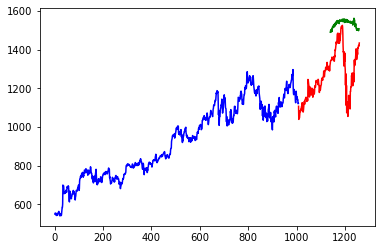

In [381]:
time_pred=range(1,len(prediction)+1)
time_pred
len_pred=len(time_pred)
len_pred
len_whole_data=len(close_data)
position=len_whole_data-len_pred
position
date_pred=range(position,len_whole_data)
date_pred

plt.plot(date_pred, prediction, color="green")
plt.plot(date_train, close_train_orig, color="blue")
plt.plot(date_test, close_test_orig, color="red")
plt.show()

Here is the forecasting. Nevertheless, you should bear in mind that future prediction is always associated with some degree of uncertainty, more so when the model´s fit is not as nice as it could be (as is true in our case). But the model can at least give us and idea on what trend might be experienced on the market.

In [416]:
# forecasting

def predict(num_prediction, model):
    prediction_list = close_data_orig[-look_back:]
    
    for _ in range(num_prediction):
        x = prediction_list[-look_back:]
        x = x.reshape((1, look_back, 1))
        out = model.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[look_back-1:]
        
    return prediction_list
    


num_prediction = 30
forecast = predict(num_prediction, model)


See how the forecasted values look like.

In [417]:
forecast

array([1433.52001953, 1314.54003906, 1160.79992676, 1225.57836914,
       1322.78027344, 1327.82971191, 1326.59936523, 1185.57666016,
       1169.78125   , 1237.47253418, 1155.72436523, 1253.87719727,
       1332.38964844, 1329.8581543 , 1330.43249512, 1337.18493652,
       1343.48046875, 1343.86181641, 1352.13134766, 1352.50646973,
       1133.79467773, 1128.82446289, 1133.28979492, 1134.27148438,
       1133.61010742, 1129.70715332, 1209.39086914, 1115.484375  ,
       1102.04162598, 1090.73901367, 1083.12512207])

In [432]:
#set the x-axis for the prediction graph
for_dates=range(1,len(forecast)+1)
for_dates

range(1, 32)

And now, visualise them in a graph.

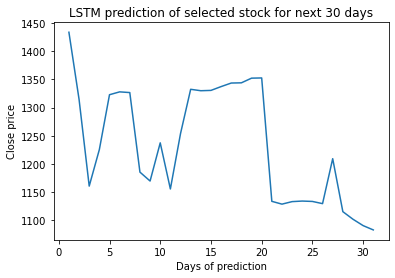

In [439]:
plt.plot(for_dates, forecast)
plt.xlabel("Days of prediction")
plt.ylabel("Close price")
plt.title("LSTM prediction of selected stock for next 30 days")
plt.show()